<a href="https://colab.research.google.com/github/biotocharles/HFD/blob/main/Bs_Mc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Overall: Mean=1.0031, Std=0.0608, Min=0.7253, Max=1.4191
Terminal Prices: Mean=1.0059, Std=0.0861, Min=0.7315, Max=1.4001


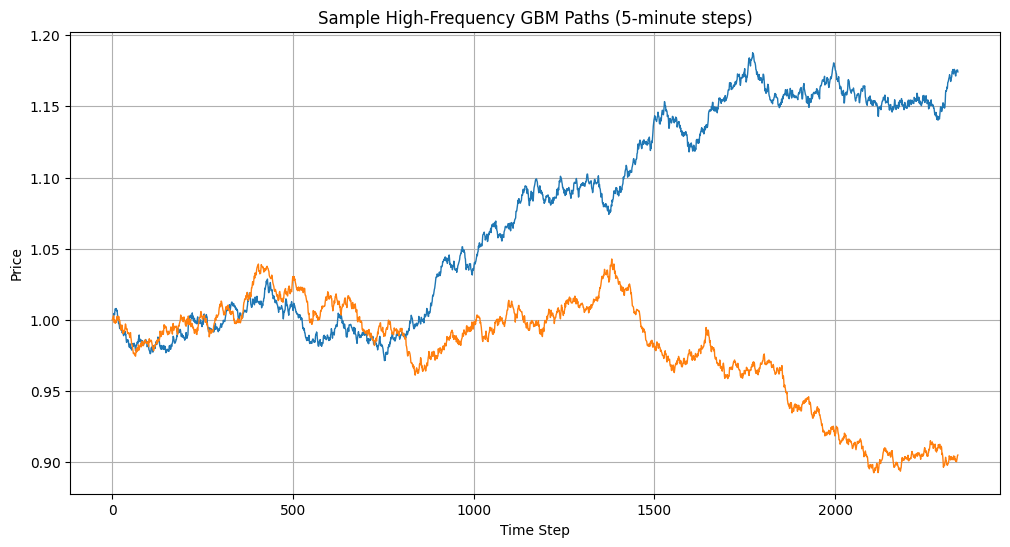

Log returns: Mean=0.000001, Std=0.001783


In [10]:
import numpy as np
import matplotlib.pyplot as plt

# -------------------------------
# PARAMETERS
# -------------------------------
S0 = 1.0                 # initial price
r = 0.05                 # annual risk-free rate
sigma = 0.25             # annual volatility
minutes_per_day = 390    # 6.5 trading hours
days_per_year = 252      # trading days in a year
minutes_per_step = 5     # high-frequency step size
delta_t = minutes_per_step / (days_per_year * minutes_per_day)   # Δt in years

steps_per_day = int(minutes_per_day / minutes_per_step)          # usually 78
days = 30                 # number of trading days
n_steps = steps_per_day * days
n_paths = 10000           # number of Monte Carlo paths

seed = 42
np.random.seed(seed)


drift = (r - 0.5 * sigma**2) * delta_t
vol_coeff = sigma * np.sqrt(delta_t)

Z = np.random.normal(0.0, 1.0, size=(n_paths, n_steps))

factors = np.exp(drift + vol_coeff * Z)  # shape: (n_paths, n_steps)

# Prepend S0 for cumulative product
factors_with_init = np.concatenate([np.ones((n_paths, 1)), factors], axis=1)

S_paths = S0 * np.cumprod(factors_with_init, axis=1)  # shape: (n_paths, n_steps+1)

all_values = S_paths.flatten()
mean_val = all_values.mean()
std_val = all_values.std()
min_val = all_values.min()
max_val = all_values.max()

print(f"Overall: Mean={mean_val:.4f}, Std={std_val:.4f}, Min={min_val:.4f}, Max={max_val:.4f}")

terminal = S_paths[:, -1]
print(f"Terminal Prices: Mean={terminal.mean():.4f}, Std={terminal.std():.4f}, Min={terminal.min():.4f}, Max={terminal.max():.4f}")

# PLOT SAMPLE PATHS
plt.figure(figsize=(12,6))
for i in range(2):  # plot 5 sample paths
    plt.plot(S_paths[i], lw=1)
plt.title("Sample High-Frequency GBM Paths (5-minute steps)")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.grid(True)
plt.show()

# OPTIONAL: LOG RETURNS
log_returns = np.log(S_paths[:,1:] / S_paths[:,:-1])
print(f"Log returns: Mean={log_returns.mean():.6f}, Std={log_returns.std():.6f}")


In [3]:
# Save entire S_paths array
np.save("S_paths.npy", S_paths)

# Load it back later
S_paths_loaded = np.load("S_paths.npy")


EXCEL

In [4]:

n_save_paths = 100

subset_paths = S_paths[:n_save_paths, :]

df = pd.DataFrame(subset_paths)

df.columns = [f"t{t}" for t in range(df.shape[1])]

# Save to Excel
df.to_excel("high_freq_data.xlsx", index=False)

print(f"Saved {n_save_paths} paths to 'high_freq_data.xlsx'")


Saved 100 paths to 'high_freq_data.xlsx'


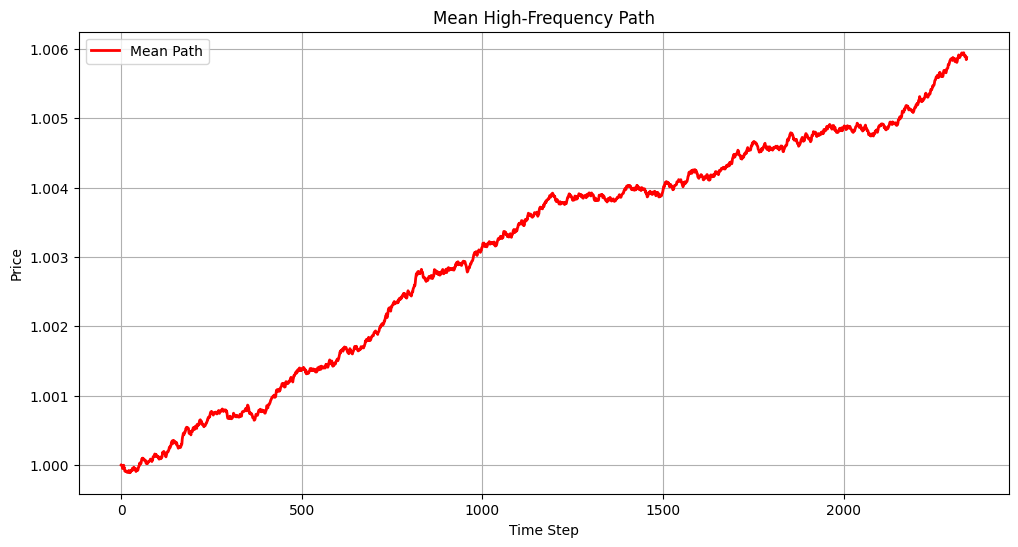

In [6]:
mean_path = S_paths.mean(axis=0)

plt.figure(figsize=(12,6))
plt.plot(mean_path, color='red', lw=2, label='Mean Path')
plt.title("Mean High-Frequency Path")
plt.xlabel("Time Step")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


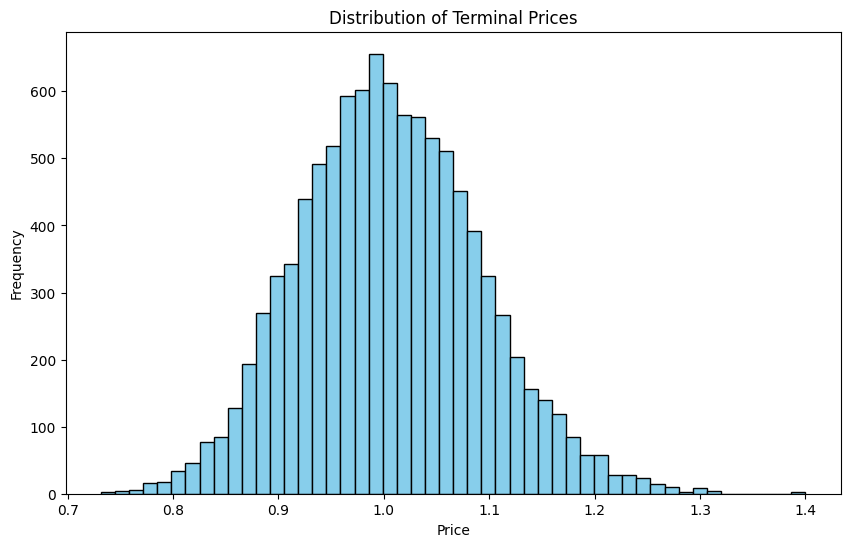

In [7]:
terminal = S_paths[:, -1]

plt.figure(figsize=(10,6))
plt.hist(terminal, bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Terminal Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


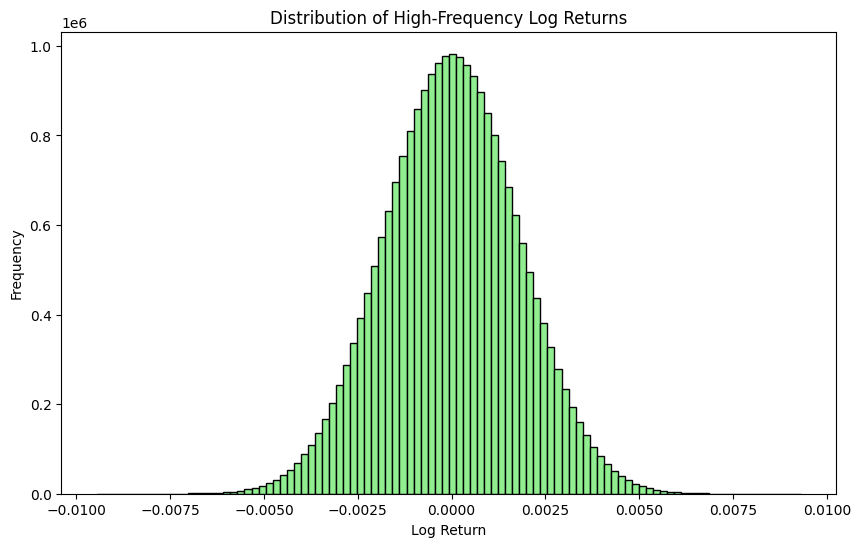

In [8]:
log_returns = np.log(S_paths[:,1:] / S_paths[:,:-1])
plt.figure(figsize=(10,6))
plt.hist(log_returns.flatten(), bins=100, color='lightgreen', edgecolor='black')
plt.title("Distribution of High-Frequency Log Returns")
plt.xlabel("Log Return")
plt.ylabel("Frequency")
plt.show()
